# MNIST Challenge

The MNIST data set is a famous example in machine learning. It is a Modified version of the data from the National Institute of Standards and Technology.

The dataset is a collection of labelled handwritten digits from Census Bureau employees and High School Students - the numbers 0-9. When provided with unlabelled digits, the challenge is to determine which digits they were.



The only background knowledge required to solve this challenge is that each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

It has become something of a challenge to predict the MNIST data using a variety of techniques, and it is routinely used to validate new models and methods.Here the aim of this project would be to validate different models in accurately predicting digits using general machine learning techniques and then expanding to deep learning-CNN architectures.

In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.datasets import fetch_mldata
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
#Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape", digits.data.shape)

# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)




Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [3]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [4]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

In [8]:
mnist['data']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
mnist['target']

array([0., 0., 0., ..., 9., 9., 9.])

In [10]:
mnist['data'].shape

(70000, 784)

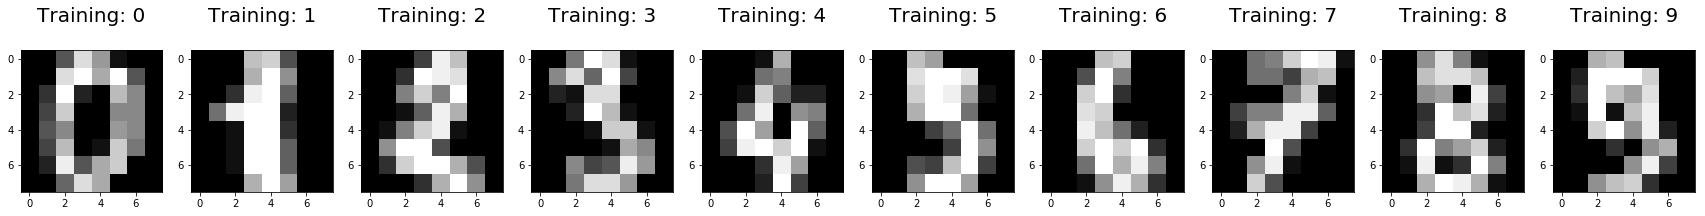

In [11]:
plt.figure(figsize=(30,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], test_size=0.30, random_state=0)

In [14]:
# define cnn model
def logistic_reg_model():
    # Create an instance of our model
    my_logreg = linear_model.LogisticRegression(solver='lbfgs')
    # Fit the model to data
    my_logreg.fit(X_train,y_train)
    #Scoring the model
    y_test_pred=my_logreg.predict(X_test)
    y_train_pred=my_logreg.predict(X_train)
    print(f"Score on train: {accuracy_score(y_train,y_train_pred):3.3f}")
    print(f"Score on test: {accuracy_score(y_test,y_test_pred):3.3f}")

In [15]:
warnings.filterwarnings(action='ignore')
print('logistic_regression_results:\n')
logistic_reg_model()

logistic_regression_results:

Score on train: 0.929
Score on test: 0.912


In [ ]:
# define cnn model
def knn_model():
    # Create an instance of our model
    my_knn = KNeighborsClassifier()
    # Fit the model to data
    my_knn.fit(X_train,y_train)
    #Scoring the model
    y_test_pred=my_knn.predict(X_test)
    y_train_pred=my_knn.predict(X_train)
    print(f"Score on train: {accuracy_score(y_train,y_train_pred):3.3f}")
    print(f"Score on test: {accuracy_score(y_test,y_test_pred):3.3f}")

In [ ]:
warnings.filterwarnings(action='ignore')
print('knn_results:\n')
knn_model()

knn_results:

Score on train: 0.980
Score on test: 0.971


In [ ]:
def dt_model():
    # Create an instance of our model
    my_dt = DecisionTreeClassifier()
    # Fit the model to data
    my_dt.fit(X_train,y_train)
    #Scoring the model
    y_test_pred=my_dt.predict(X_test)
    y_train_pred=my_dt.predict(X_train)
    print(f"Score on train: {accuracy_score(y_train,y_train_pred):3.3f}")
    print(f"Score on test: {accuracy_score(y_test,y_test_pred):3.3f}")

In [ ]:
warnings.filterwarnings(action='ignore')
print('dt_results:\n')
dt_model()

dt_results:

Score on train: 1.000
Score on test: 0.869


In [10]:
def svm_model():
    # Create an instance of our model
    my_SVC = SVC(kernel='linear')
    # Fit the model to data
    my_SVC.fit(X_train,y_train)
    #Scoring the model
    y_test_pred=my_SVC.predict(X_test)
    y_train_pred=my_SVC.predict(X_train)
    print(f"Score on train: {accuracy_score(y_train,y_train_pred):3.3f}")
    print(f"Score on test: {accuracy_score(y_test,y_test_pred):3.3f}")


In [ ]:
warnings.filterwarnings(action='ignore')
print('svm_results:\n')
svm_model()

svm_results:



In [6]:
def AD_boost_model():
    # Create an instance of our model
    my_AD = AdaBoostClassifier()
    # Fit the model to data
    my_AD.fit(X_train,y_train)
    #Scoring the model
    y_test_pred=my_AD.predict(X_test)
    y_train_pred=my_AD.predict(X_train)
    print(f"Score on train: {accuracy_score(y_train,y_train_pred):3.3f}")
    print(f"Score on test: {accuracy_score(y_test,y_test_pred):3.3f}")

In [7]:
warnings.filterwarnings(action='ignore')
print('AdaBoost_results:\n')
AD_boost_model()

AdaBoost_results:

Score on train: 0.734
Score on test: 0.735


In [8]:
def XG_boost_model():
    # Create an instance of our model
    my_XG = XGBClassifier()
    # Fit the model to data
    my_XG.fit(X_train,y_train)
    #Scoring the model
    y_test_pred=my_XG.predict(X_test)
    y_train_pred=my_XG.predict(X_train)
    print(f"Score on train: {accuracy_score(y_train,y_train_pred):3.3f}")
    print(f"Score on test: {accuracy_score(y_test,y_test_pred):3.3f}")

In [9]:
warnings.filterwarnings(action='ignore')
print('XGBoost_results:\n')
XG_boost_model()

XGBoost_results:

Score on train: 0.946
Score on test: 0.935


As we can see,without any hyper parameter tuning we got highest accuracy for knn model.Lets try to improve its accuracy.Since my intention is to check how a simple CNN architecture is outperforming other models for digit classification,I am not tuning hyper-parameter for each model and choosing the best model(Ideal Case).Here assuming even with tuning ,each model may increase around 3%,still knn outweighs other models.

I tried hyper parameter tuning using grid search but its very time consuming for knn model and large dataset.So I could not run the cells below.

In [4]:
k_range = list(range(1, 25))
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]}


In [5]:
my_knn = KNeighborsClassifier()

In [6]:
grid = GridSearchCV(my_knn, param_grid, cv=5, scoring='accuracy')

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
# examine the best model
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

In [ ]:
grid.score(X_test, y_test)

In [ ]:
i=range(1,200,50)
accuracy_test=[]
accuracy_train=[]
for x in i:
    #Instantiate the model
    KNN_model = KNeighborsClassifier(n_neighbors=x,n_jobs=-1)
    #Fit the model 
    KNN_model.fit(X_train, y_train)
    #Evaluate the model on test dataset
    acc_test=KNN_model.score(X_test,y_test)
    accuracy_test.append(acc_test)
    #Evaluate the model on train dataset
    acc_train=KNN_model.score(X_train, y_train)
    accuracy_train.append(acc_train)

In [ ]:
#Lets visualise the accuarcy versus depth of DT tree to estimate ideal value
plt.figure()
plt.plot(accuracy_train,label='train')
plt.plot(accuracy_test,label='test')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

The next jupyter notebook would have CNN model for this dataset